<a href="https://colab.research.google.com/github/deepthi-aiml/My-AI-ML-Projects/blob/main/Titanic_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Your Arsenal**

In [ ]:
# Data Handling
import numpy as np
import pandas as pd

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Magic command for jupyter Notebook to display plots inline
%matplotlib inline

In [ ]:
# Set a style for your plots to make them look professional
sns.set_style('whitegrid')

# **Load the Data and First Impressions**

In [ ]:
# Load the dataset
import pandas as pd
df = pd.read_csv("titanic.csv")

In [ ]:
data = df.copy()

In [ ]:
# Get the "big picture" - shape and first 5 rows
print("Dataser Dimension:", data.shape)
print("\nFirst Look:")
display(data.head())

Dataser Dimension: (891, 15)

First Look:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print("\nDataset Info:")
data.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


# **Basic statistics**

In [ ]:
# Get descriptive statistics for numerical features
print("Numerical Description:")
display(data.describe())

Numerical Description:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Get descriptive statistics for categorical features
print("\nCategorical Description:")
display(data.describe(include=['O']))


Categorical Description:


,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


# **Data Cleaning and Preprocessing (The "Missing it Usable" Phase)**

In [ ]:
# Calculate the Percentage of missing values for each column
missing_percent = (data.isnull().sum() / len(data)) *100
missing_percent = missing_percent[missing_percent > 0]. sort_values(ascending = False)
print("Missing Value Percentage:")
print(missing_percent)

Missing Value Percentage:
deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
dtype: float64


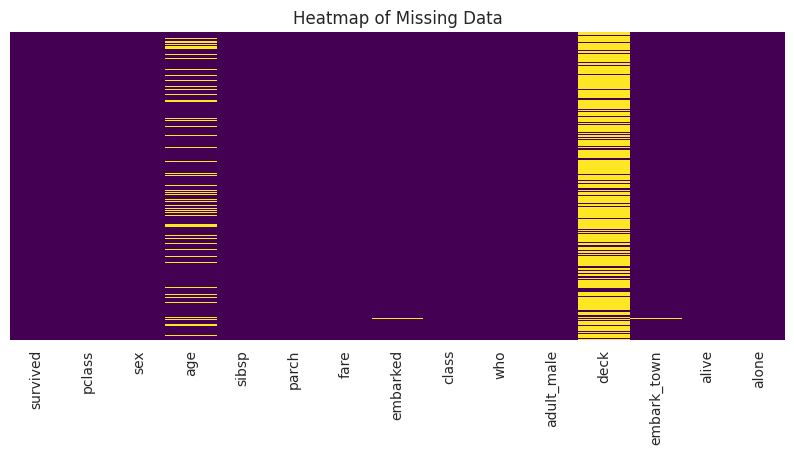

In [ ]:
# Let's Visualize the missing Data
plt.figure(figsize=(10, 4))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

In [ ]:
# Advanced approach: Extract Deck
# This needs to be done before dropping the 'deck' column
data['Deck'] = data['deck'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')
display(data.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Deck
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Unknown
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Unknown
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,C
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Unknown


In [ ]:
# Group the data and canculate the median age for each group
age_medians = data.groupby(['pclass', 'sex'])['age'].median()
print(age_medians)

pclass  sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: age, dtype: float64


In [ ]:
# Define a function to impute age based on group
def impute_age(row):
  age = row['age']
  pclass = row['pclass']
  sex = row['sex']
  if pd.isna(age):
      return age_medians[pclass][sex]
  else:
      return age

In [ ]:
# Apply the function
data['age'] = data[['age', 'pclass', 'sex']].apply(impute_age, axis=1)

In [ ]:
print(data['embarked'].value_counts())
data['embarked'].fillna('S', inplace=True)

embarked
S    644
C    168
Q     77
Name: count, dtype: int64


/tmp/ipython-input-482334360.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embarked'].fillna('S', inplace=True)


# Verify Cleaning Work

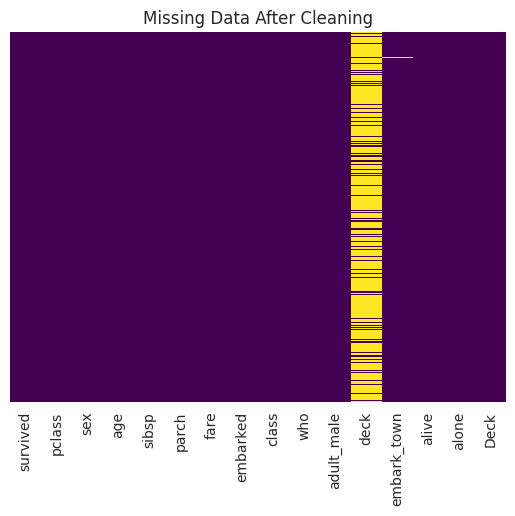

Remaining missing values: 690


In [ ]:
# Checking the heaadmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data After Cleaning')
plt.show()
print("Remaining missing values:", data.isnull().sum().sum())

# Exploratory Data Analysis and Visualization

/tmp/ipython-input-1192285237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=data, palette='viridis')


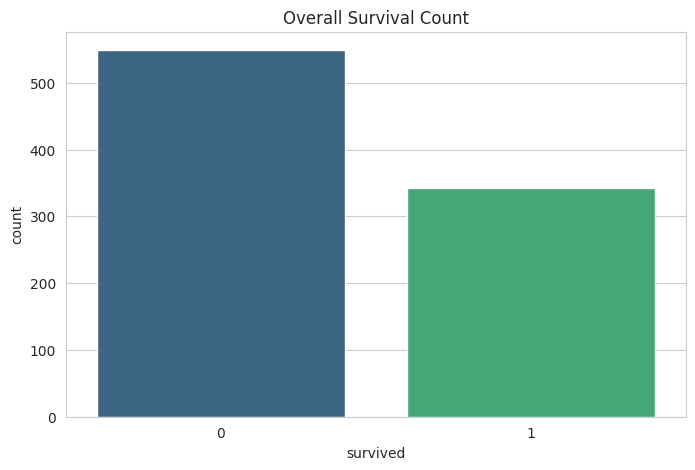

Overall Survival Rate: 38.38%


In [ ]:
# Countplot of survivors
plt.figure(figsize=(8,5))
sns.countplot(x='survived', data=data, palette='viridis')
plt.title('Overall Survival Count')
plt.show()
survival_rate = data['survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.2%}")


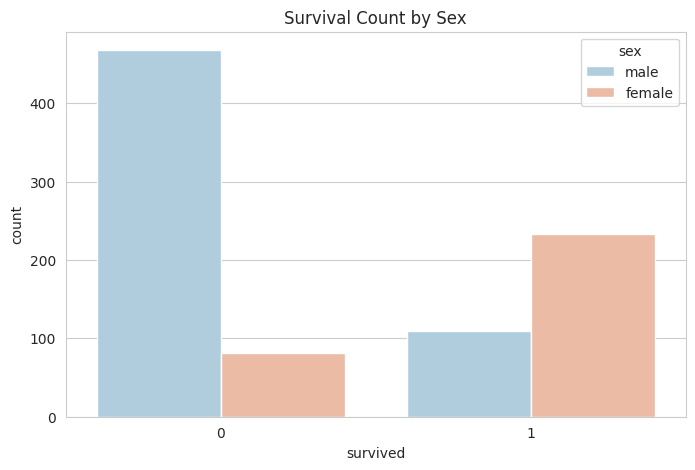

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='survived', hue='sex', data=data, palette='RdBu_r')
plt.title("Survival Count by Sex")
plt.show()
print(data.groupby('sex')['survived'].mean())


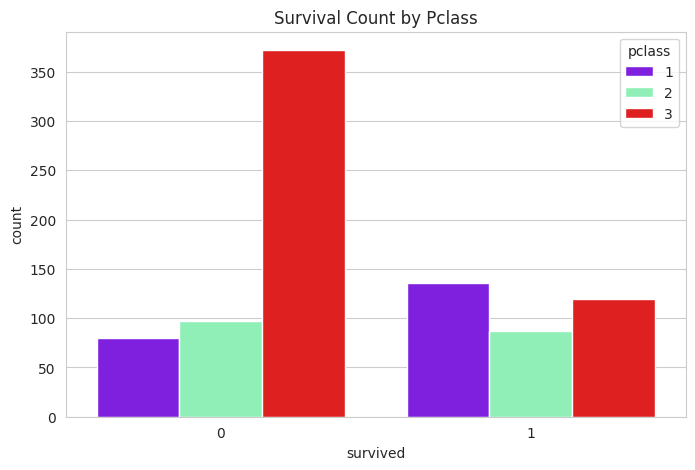

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='survived', hue='pclass', data=data, palette='rainbow')
plt.title("Survival Count by Pclass")
plt.show()
print(data.groupby('pclass')['survived'].mean())

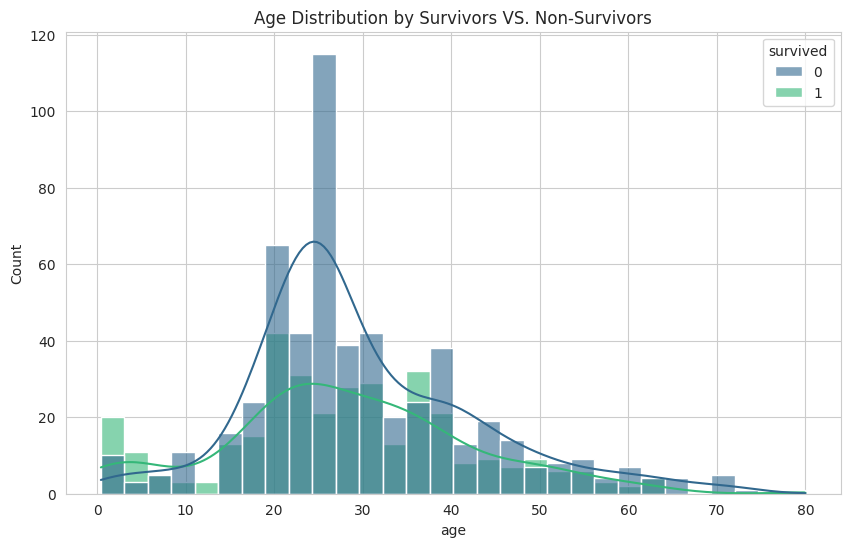

/tmp/ipython-input-3567887035.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=data, palette='viridis')


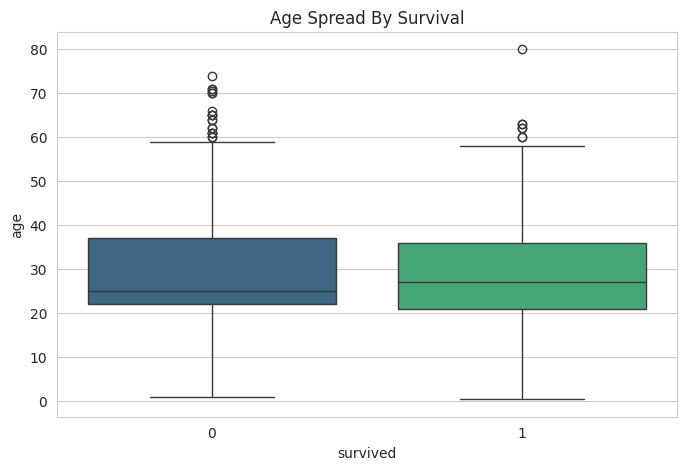

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='age', hue='survived', bins=30, kde=True, alpha=0.6, palette='viridis')
plt.title("Age Distribution by Survivors VS. Non-Survivors")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='survived', y='age', data=data, palette='viridis')
plt.title("Age Spread By Survival")
plt.show()



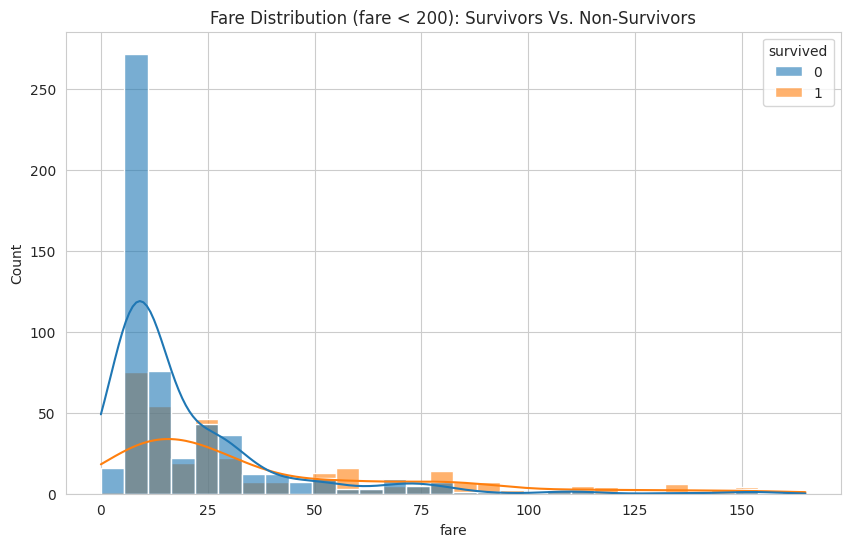

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data[data['fare'] < 200], x='fare', hue='survived', bins=30, kde=True, alpha=0.6)
plt.title("Fare Distribution (fare < 200): Survivors Vs. Non-Survivors")
plt.show()

In [ ]:
data['FamilySize'] = data['sibsp'] + data['parch'] + 1
data['IsAlone'] = 1
data.loc[data['FamilySize'] > 1, 'IsAlone'] = 0

IsAlone
0    0.505650
1    0.303538
Name: survived, dtype: float64


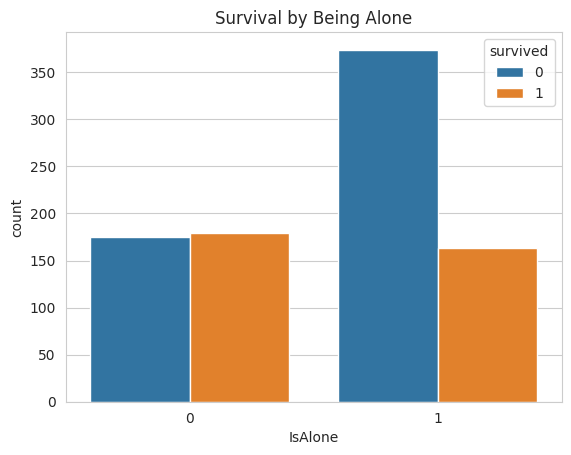

In [ ]:
print(data.groupby('IsAlone') ['survived'].mean())
sns.countplot(x='IsAlone', hue='survived', data=data)
plt.title('Survival by Being Alone')
plt.show()


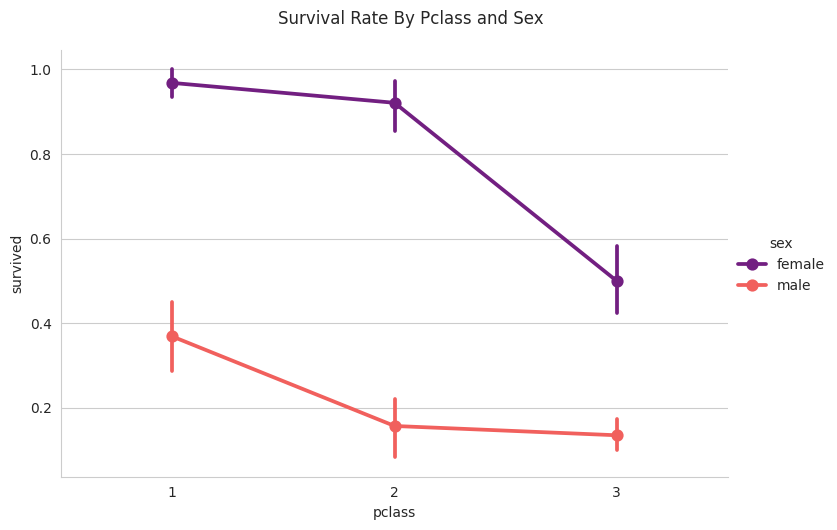

In [ ]:
g = sns.catplot(x='pclass', y='survived', hue='sex', data=data, kind='point', palette='magma', height=5, aspect=1.5)
g.fig.suptitle('Survival Rate By Pclass and Sex', y=1.05)
plt.show()


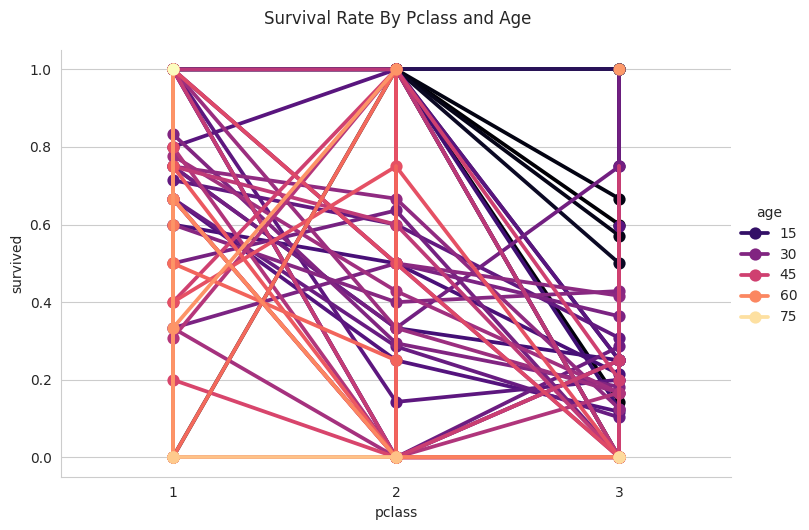

In [ ]:
g = sns.catplot(x='pclass', y='survived', hue='age', data=data, kind='point', palette='magma', height=5, aspect=1.5)
g.fig.suptitle('Survival Rate By Pclass and Age', y=1.05)
plt.show()

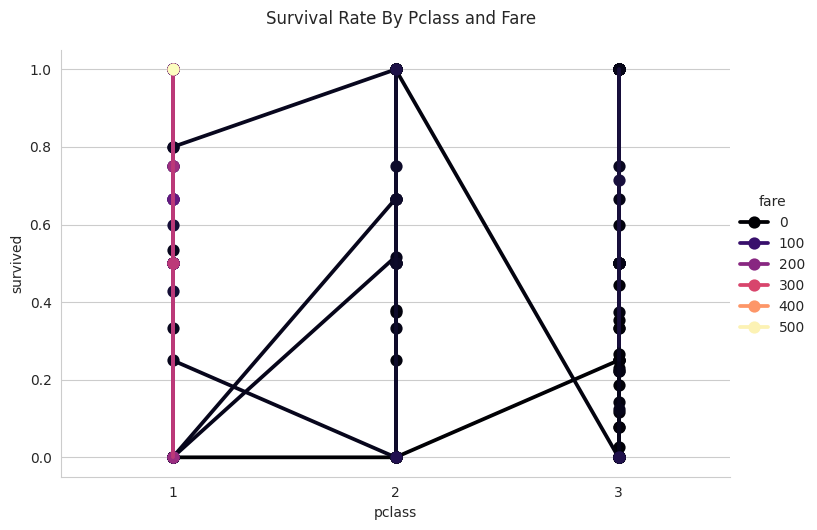

In [ ]:
g = sns.catplot(x='pclass', y='survived', hue='fare', data=data, kind='point', palette='magma', height=5, aspect=1.5)
g.fig.suptitle('Survival Rate By Pclass and Fare', y=1.05)
plt.show()

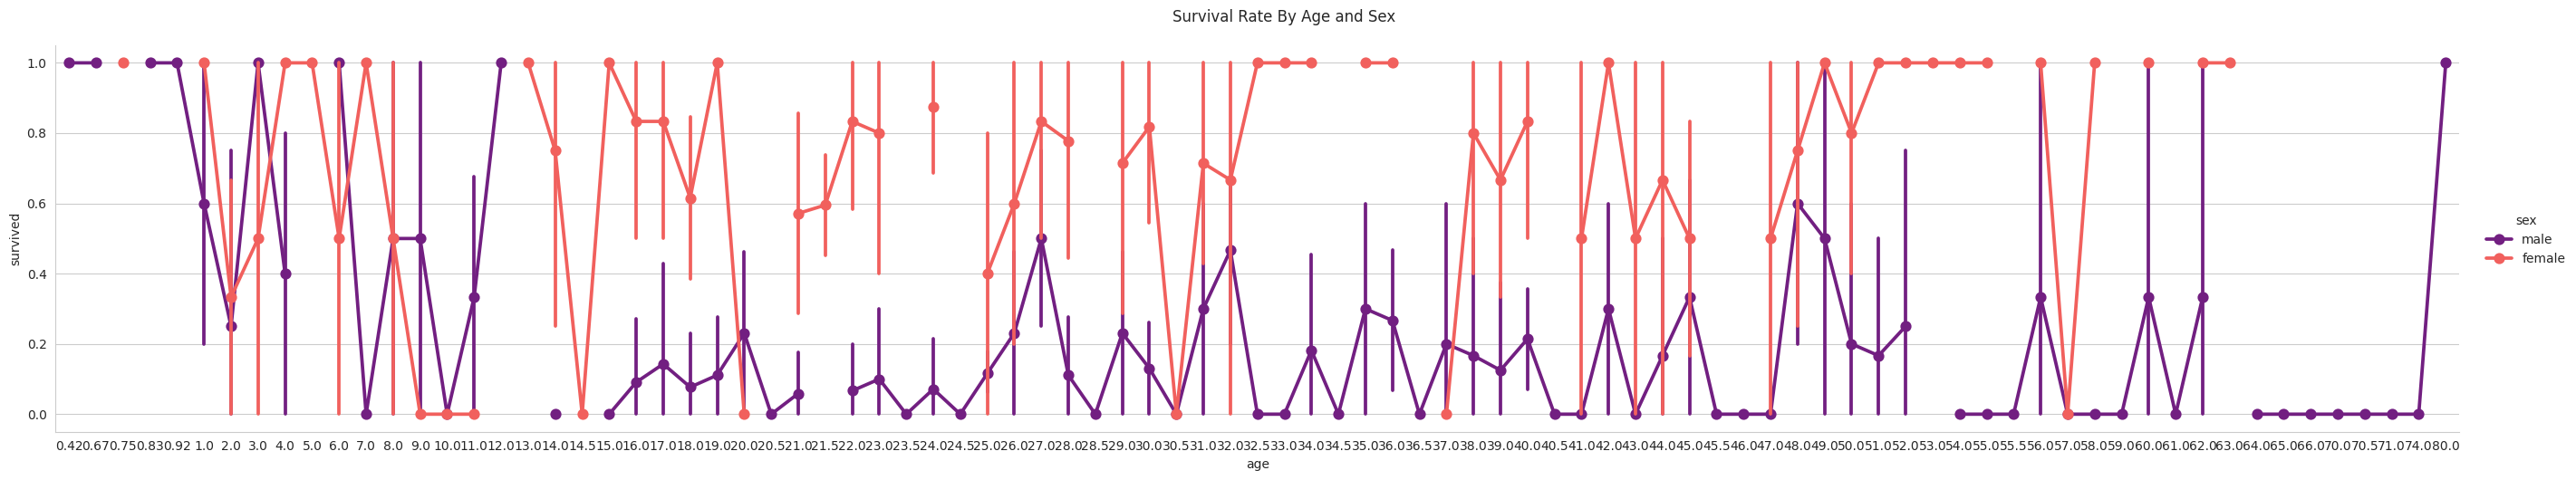

In [ ]:
g = sns.catplot(x='age', y='survived', hue='sex', data=data, kind='point', palette='magma', height=5, aspect=5.5)
g.fig.suptitle('Survival Rate By Age and Sex', y=1.05)
plt.show()

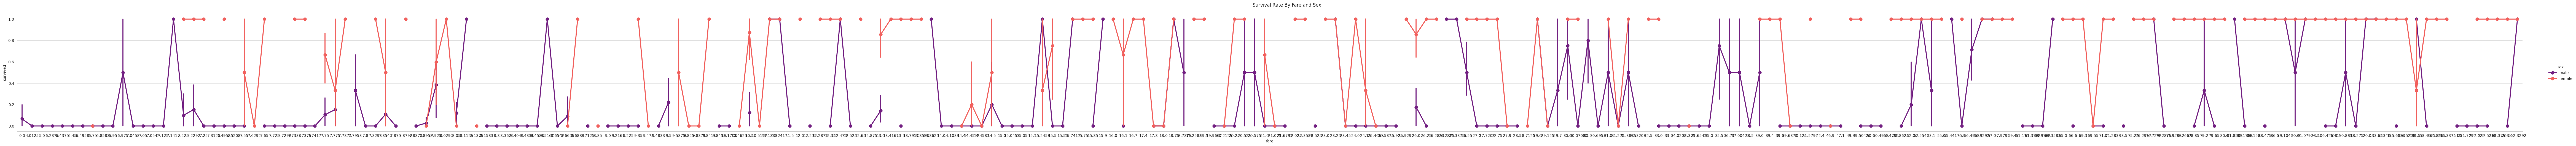

In [ ]:
g = sns.catplot(x='fare', y='survived', hue='sex', data=data, kind='point', palette='magma', height=5, aspect=18.5)
g.fig.suptitle('Survival Rate By Fare and Sex', y=1.05)
plt.show()